In [47]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import json

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns


## Fixing the million columns

In [48]:
dtypes = {
    'eventid': 'int',
    'iyear': 'int',
    'imonth': 'str',
    'iday': 'str',
    'country_txt': 'category',
    'region_txt': 'category',
    'provstate': 'category',
    'city': 'str',
    'latitude': 'float',
    'longitude': 'float',
    'summary': 'str',
    'crit1': 'int',
    'crit2': 'int',
    'crit3': 'int',
    'doubtterr': 'float',
    'success': 'float',
    'suicide': 'float',
    'attacktype1_txt': 'str',
    'attacktype2_txt': 'str',
    'attacktype3_txt': 'str',
    'targtype1_txt': 'str',
    'targsubtype1_txt': 'str',
    'natlty1_txt': 'str',
    'gname': 'category',
    'motive': 'str',
    'nperps': 'float',
    'nperpcap': 'float',
    'claimed': 'float',
    'weaptype1_txt': 'category',
    'weaptype2_txt': 'category',
    'nkill': 'float',
    'nkillter': 'float',
    'nwound': 'float',
    'propextent_txt': 'str',
    'nhostkid': 'float'
}

In [3]:
df = pd.read_excel('data/globalterrorismdb_0718dist.xlsx', na_values=['nan'], dtype=dtypes, usecols=['eventid', 'iyear', 'imonth', 'iday', 'country','country_txt', 'region_txt','provstate','city','latitude','longitude','summary','crit1','crit2','crit3','doubtterr','success','suicide','attacktype1_txt','attacktype2_txt','attacktype3_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname','motive','nperps','nperpcap','claimed','weaptype1_txt','weaptype2_txt','weapdetail','nkill','nkillter','nwound','propextent_txt','nhostkid'])

## Reading in Census Bureau populations
Using 2018 population estimations

In [4]:
pops = pd.read_csv("data/scprc-est2018-18+pop-res.csv")

In [5]:
pops.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6
1,40,3,6,1,Alabama,4887871,3798031,77.7
2,40,4,9,2,Alaska,737438,553622,75.1
3,40,4,8,4,Arizona,7171646,5528989,77.1
4,40,3,7,5,Arkansas,3013825,2310645,76.7


## I only want to look at U.S. events

In [6]:
df = df[(df['country_txt'] == 'United States') & (df.iyear > 2015)]

In [7]:
df.to_csv('data/terrorism_us_since_2016.csv', index=False)

In [49]:
df = pd.read_csv('data/terrorism_us_since_2016.csv')

In [50]:
df.shape

(129, 37)

## What groups are in here?

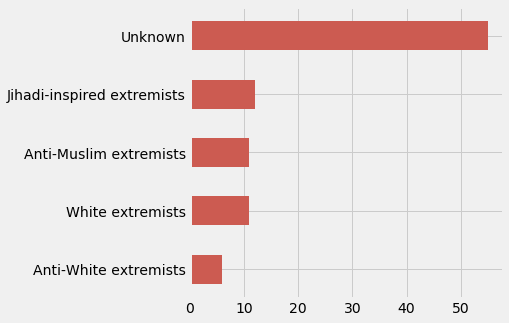

In [84]:
df.gname.value_counts().sort_values().tail().plot(kind='barh', figsize=(5,5), color='#CC5B51')

plt.savefig("images/top_groups.svg", bbox_inches='tight', transparent=True)

## What are in the unknowns?

In [11]:
unknown = df[df.gname == 'Unknown']

In [12]:
unknown.dtypes

eventid             int64  
iyear               int64  
imonth              int64  
iday                int64  
country             int64  
country_txt         object 
region_txt          object 
provstate           object 
city                object 
latitude            float64
longitude           float64
summary             object 
crit1               int64  
crit2               int64  
crit3               int64  
doubtterr           float64
success             float64
suicide             float64
attacktype1_txt     object 
attacktype2_txt     object 
attacktype3_txt     float64
targtype1_txt       object 
targsubtype1_txt    object 
natlty1_txt         object 
gname               object 
motive              object 
nperps              float64
nperpcap            float64
claimed             float64
weaptype1_txt       object 
weaptype2_txt       object 
weapdetail          object 
nkill               float64
nkillter            float64
nwound              float64
propextent_txt      

In [13]:
unknown.shape

(55, 37)

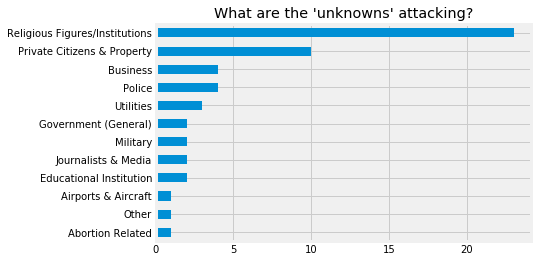

In [14]:
unknown.targtype1_txt.value_counts().sort_values().plot(kind='barh', title="What are the 'unknowns' attacking?")

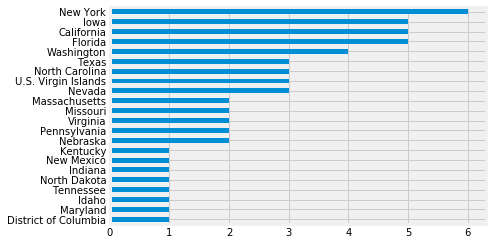

In [15]:
unknown.provstate.value_counts().sort_values().plot(kind='barh')

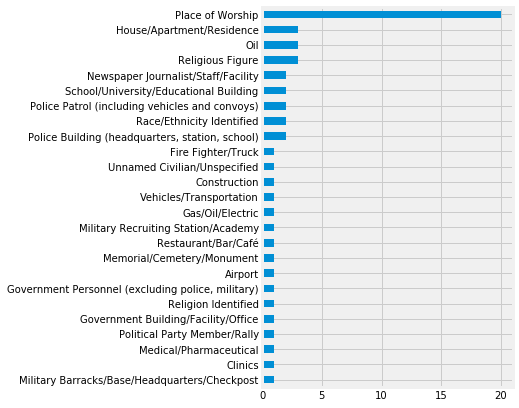

In [16]:
unknown.targsubtype1_txt.value_counts().sort_values().plot(kind='barh', figsize=(4,7))

In [17]:
unknown['iyear'] = unknown['iyear'].astype(str)
unknown['imonth'] = unknown['imonth'].astype(str)
unknown['iday'] = unknown['iday'].astype(str)

def get_date(x):
    return x.iyear + "/" + x.imonth + "/" + x.iday

unknown['date'] = unknown.apply(get_date, axis=1)
unknown['date'] = pd.to_datetime(unknown.date)

C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sawye\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

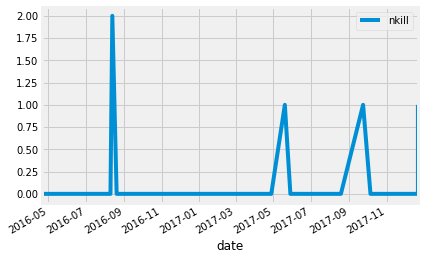

In [18]:
unknown.plot(kind='line', x='date', y='nkill')

## Muslim vs white extremist attacks

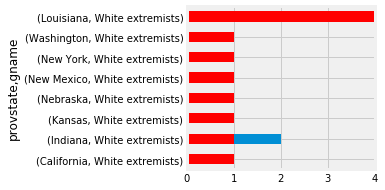

In [19]:
ax = df[df.gname == 'Muslim extremists'].groupby('provstate').gname.value_counts().sort_values().plot(kind='barh', figsize=(3,3), xlim=[0,4])

df[df.gname == 'White extremists'].groupby('provstate').gname.value_counts().sort_values().plot(kind='barh', figsize=(3,3), color='red')

In [20]:
df.nkill = df.nkill.astype(str)

In [21]:
## Export for qgis
df.to_csv("data/terrorism_us.csv", index=False)

## Mapbox?

In [22]:
def get_coords(x):
#     geometry = {}
    try:
        try:
            x['place'] = x.city+", "+x.provstate
        except:
            x['place'] = x.city
        x['geometry.type'] = 'Point'
        coords = []
        coords.append(x.longitude)
        coords.append(x.latitude)
        x['geometry.coordinates'] = coords
        return x
    except: 
        return nan

In [23]:
df = df.apply(get_coords, axis=1)

In [24]:
def prop_ids(x):
    if x['attacktype1_txt'] == "Facility/Infrastructure Attack":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#20365E"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 1
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Armed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#E84C3D"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 2
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Bombing/Explosion":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#D25302"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 3
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Unarmed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#FDDBB0"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 4
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Barricade Incident)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#354A5F"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 5
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Assassination":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#9A59B5"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 6
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Kidnapping)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#3598DB"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 7
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hijacking":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 8
        x['properties.radius'] = x.nkill
        return x
    else:
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 9
        x['properties.radius'] = x.nkill
        return x

In [25]:
df = df.apply(prop_ids, axis=1)

In [26]:
def prop_headline(x):
    return x

In [27]:
df['properties.headline'] = df.gname.apply(lambda x: prop_headline(x))

In [28]:
df.shape

(129, 47)

In [29]:
def prop_article(row):
    return f"\
    <div id='article_container'>\
    <h2>{row.gname}</h1>\
    <div id='headline'><h4 style='border-bottom: 3px solid {row.properties_color}'>{row.attacktype1_txt}</h2></div>\
    <p >{row.summary}</p>\
    <p><b>People killed:</b> {row.nkill} people</p>\
    <p><b>People Wounded:</b> {row.nwound}.</p>\
    <p><b>Target:</b> {row.targtype1_txt}\
    </div>" 


In [30]:
df['properties.article'] = df.apply(prop_article, axis=1)

In [31]:
df.to_csv("terrorism_us_map.csv", index=False)

In [32]:
map_df = pd.read_csv("terrorism_us_map.csv", thousands=",", usecols=['geometry.coordinates', 'geometry.type', 'properties.name', 'properties.headline', 'properties.article', 'properties.color', 'properties.group_id', 'properties.group_name', 'properties.radius'])

In [33]:
map_df['geometry.coordinates'] = map_df['geometry.coordinates'].apply(json.loads)

In [34]:
ok_json = json.loads(map_df.to_json(orient='records'))

In [35]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [36]:
geo_format = process_to_geojson(ok_json)

In [37]:
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = " + json.dumps(geo_format))

## Zooming out to look at each state

In [38]:
state_counts = pd.DataFrame(df['provstate'].value_counts()).reset_index()

In [39]:
state_counts.head()

,index,provstate
0,New York,18
1,Florida,13
2,California,9
3,Texas,8
4,Pennsylvania,6


In [40]:
state_counts = state_counts.merge(pops, left_on='index', right_on='NAME')

In [41]:
state_counts['per_capita'] = (state_counts['provstate'] / state_counts['POPESTIMATE2018']) * 10000000
state_counts

,index,provstate,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS,per_capita
0,New York,18,40,1,2,36,New York,19542209,15474107,79.2,9.210832
1,Florida,13,40,3,5,12,Florida,21299325,17070244,80.1,6.103480
2,California,9,40,4,9,6,California,39557045,30567090,77.3,2.275195
3,Texas,8,40,3,7,48,Texas,28701845,21303746,74.2,2.787277
4,Pennsylvania,6,40,1,2,42,Pennsylvania,12807060,10158149,79.3,4.684916
5,Washington,6,40,4,9,53,Washington,7535591,5872306,77.9,7.962216
6,Missouri,6,40,2,4,29,Missouri,6126452,4749622,77.5,9.793597
7,Louisiana,5,40,3,7,22,Louisiana,4659978,3564062,76.5,10.729664
8,Iowa,5,40,2,4,19,Iowa,3156145,2425378,76.8,15.842111
9,Nevada,5,40,4,8,32,Nevada,3034392,2345395,77.3,16.477766


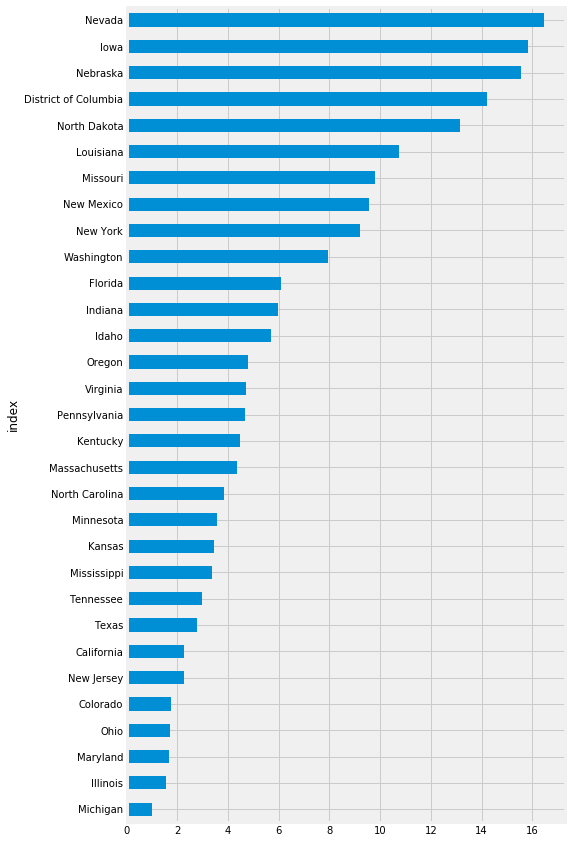

In [42]:
state_counts.sort_values(by='per_capita').plot(kind="barh", x='index', y='per_capita', figsize=(7,15), legend=False, width=.5)

In [43]:
latlong = pd.read_csv('C:/Users/sawye/Documents/Random__data/geographic/states/us-state-capitals.csv')

In [44]:
state_counts = state_counts.merge(latlong, right_on='state', left_on='index')

In [45]:
state_counts.head()

,index,provstate,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS,per_capita,state,description,Latitude,Longitude
0,New York,18,40,1,2,36,New York,19542209,15474107,79.2,9.210832,New York,Albany,42.652843,-73.757874
1,Florida,13,40,3,5,12,Florida,21299325,17070244,80.1,6.103480,Florida,Tallahassee,30.438118,-84.281296
2,California,9,40,4,9,6,California,39557045,30567090,77.3,2.275195,California,Sacramento,38.576668,-121.493629
3,Texas,8,40,3,7,48,Texas,28701845,21303746,74.2,2.787277,Texas,Austin,30.274670,-97.740349
4,Pennsylvania,6,40,1,2,42,Pennsylvania,12807060,10158149,79.3,4.684916,Pennsylvania,Harrisburg,40.264378,-76.883598


In [46]:
state_counts.to_csv('data/terrorism_by_state_since_2016.csv', index=False)